# Sprint 4
## Tasca M4 T02

Allison Garces Castaño

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import circlify

In [9]:
datos = pd.read_csv("movies.csv", sep=";", encoding='utf-8', index_col="Id")

movies= pd.DataFrame(data=datos)
movies.sample(frac=0.5, random_state=1)

,Nombre Pelicula,Ano,Genero
Id,,,
3658,Quatermass and the Pit,1967,Sci-Fi
2471,Crocodile Dundee II,1988,Adventure
1076,"Innocents, The",1961,Thriller
1103,Rebel Without a Cause,1955,Drama
1003,Extreme Measures,1996,Drama
...,...,...,...
2639,Mommie Dearest,1981,Drama
2490,Payback,1999,Action
92,Mary Reilly,1996,Drama


In [7]:
movies.shape

(3883, 4)

In [8]:
movies.columns

Index(['Id', 'Nombre Pelicula', 'Ano', 'Genero'], dtype='object')

In [10]:
movies.Genero.unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

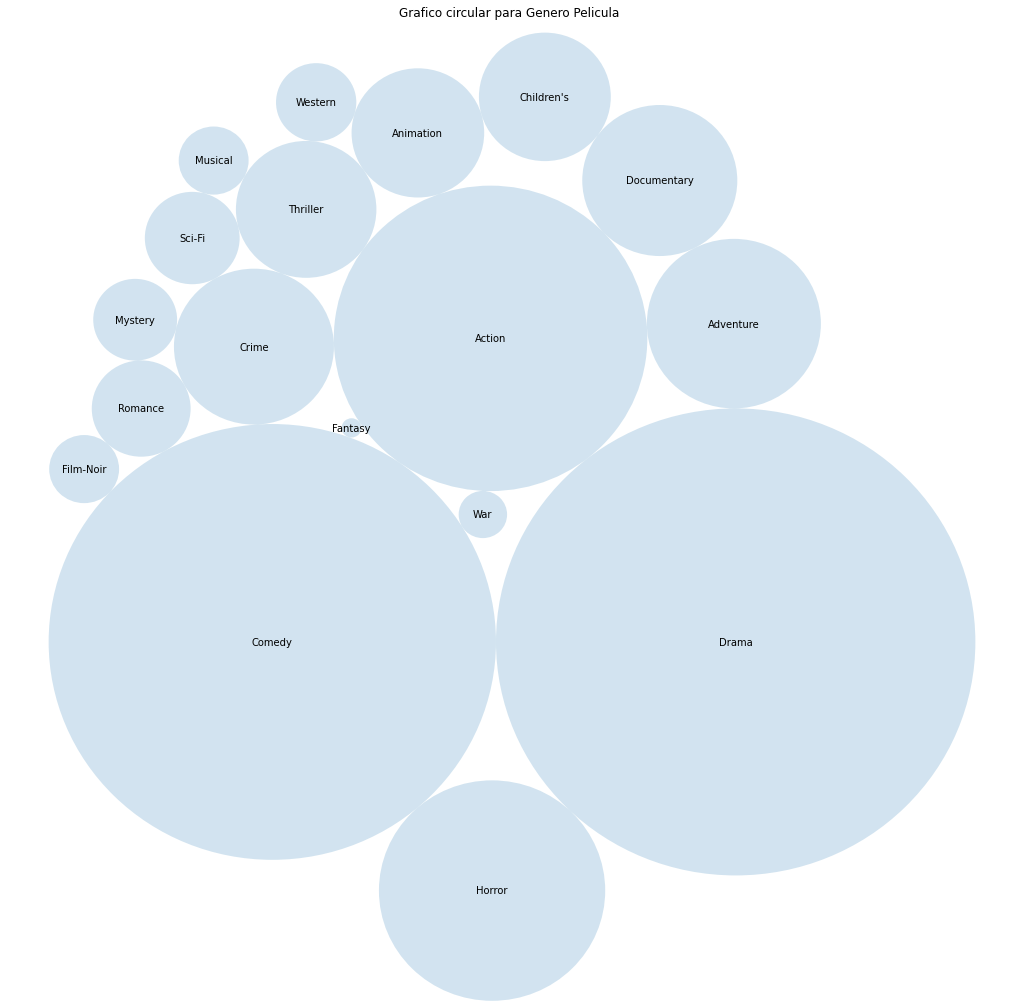

In [35]:
do = movies.groupby(["Genero"]).size().sort_values(ascending=True).reset_index(name="Cantidad Genero")

circles = circlify.circlify(
    do["Cantidad Genero"].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(18,18))

# Title
ax.set_title("Grafico circular para Genero Pelicula")

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = do["Genero"]

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )

Queria mostrar de una manera diferente, la representacion que tiene los generos de la pelicula, representado por el numero de veces que esta. Donde se puede observar que el genero que mas tiene peliculas es el de Drama y seguidamente la comedia. 
Lo represento con una figura llamada "Cuadro básico de embalaje circular", donde cada entidad del conjunto de datos está representada por un círculo. 
Esta columna es muy importante para la base de datos, ya que aporta informacion clara para poder agrupar cada pelicula.